**DATA MINING**

NAMA : NAJWA RANDISTY AQILAH

METODE : BAGGING (BOOSTRAP AGGREGATING)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

In [ ]:
# 1. Memuat dataset Heart Disease dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=columns, na_values="?", header=None)

**Interpretasi :** data set yang diambil berasal dari UCI Machine Learning Repository dengan nama data Heart Disease Dataset.

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**Penjelasan Data**

*   Age : Usia Pasien
*   Sex : Jenis Kelamin (1 L, 0 P)
*   Cp : jenis nyeri dada
*   Trestbps : tekanan darah saat ist (mmHg)
*   Chol : kolesterol serum mg/dl
*   fbs : Gula Darah Puasa > 120mg/dl (1,T,0 F)
*   restecg : Hasil elektrokardiografi saat ist (0,1,2)
*   thalach : Denyut Jantung maks yg dicapai
*   exang : Angina akibat olahraga (1 Ya, 0, Tidak)
*   oldpeak : Depresi ST.
*   slope : Kemiringan segmen ST.
*   Ca : Jumlah pembuluh darah utama (0-3)
*   Thal : Kategori thalassemia (0,1,2,3)
*   Target : Risiko Penyakit Jantung (1 Ya, 0, Tidak)










In [ ]:
# 2. Menangani missing values
data = data.dropna()  # Menghapus baris dengan nilai yang hilang

In [ ]:
# Step 2: Explore the data
print(data.head())
print(data.info())
print(data.describe())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-

**Interpretasi :** Data terdiri dari 297 baris dan 14 kolom variabel. Dengan 13 variabel bersifat numerik yang mencakup tekanan darah dan lainnya, sedangkan 1 variabel bersifat integer yang memperlihatkan tingkat risiko penyakit jantung.

*   Usia pasien memiliki rentang 29-77 tahun. Dan rata-rata usia 54.54 tahun yang menunjukkan bahwa pasien cenderung dari kelompo dewasa menengah hingga lansia. Dengan rata rata jenis kelamin pasien yaitu 68% Laki-Laki.
*   Target (Tingkat Risiko Penyakit Jantung) dengan rata-rata 0.95 yang artinya sebagian besar pasien memiliki risiko penyakit jantung yang rendah-sedang.




In [ ]:
# 3. Memisahkan fitur dan target
X = data.drop(columns=["target"])
y = (data["target"] > 0).astype(int)  # Menjadikan target biner (1 = ada penyakit, 0 = tidak)

In [ ]:
# 4. Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0
262,60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
107,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
274,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0


In [ ]:
y_train

,target
277,0
262,0
30,0
22,1
281,0
...,...
190,0
71,1
107,1
274,1


Memperlihatkan data x_train dan y_train

In [ ]:
# 5. Membuat model Bagging dengan Decision Tree
base_model = DecisionTreeClassifier()  # Model dasar
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

In [ ]:
# 6. Melatih model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
# 7. Evaluasi model
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# 8. Menampilkan hasil
print(f"Akurasi model Bagging: {accuracy:.2f}")
print("\nLaporan Klasifikasi:\n", report)


Akurasi model Bagging: 0.83

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



**Interpretasi :**  
*   Akurasi dengan nilai 0.83 yang artinya 83% dari total prediksi model benar untuk kedua target
1.   Penjelasan Untuk Target 0 (Tidak ada penyakit jantung) :
Prediksi pada target 0 benar sebesar 84% dengan model berhasil mengidentifikasi 89% benar dan menunjukkan F1-Score tinggi bahwa model baik dalam mengklasifikasikan target 0 atau tidak memiliki penyakit jantung sebesar 86%
2.   Penjelasan Untuk Target 1 (Ada penyakit jantung) :
Prediksi pada target 1 benar sebesar 82% dengan model berhasil mengidentifikasi 75% benar dan menunjukkan F1-Score lebih rendah dibandingkan dengan target 0 tetapi masih cukup baik sebesar 78%.

**Kesimpulan :**
Model bekerja sangat baik untuk mendeteksi pasien yang tidk memiliki penyakit jantung, tetapi untuk mendeteksi adanya penyakit jantung pada pasien memiliki performa yang lebih rendah yaitu sebesar 75% yang artinya bahwa 25% dari pasien seharusnya terdeteksi penyakit jantung tetapi tidak terdeteksi.  





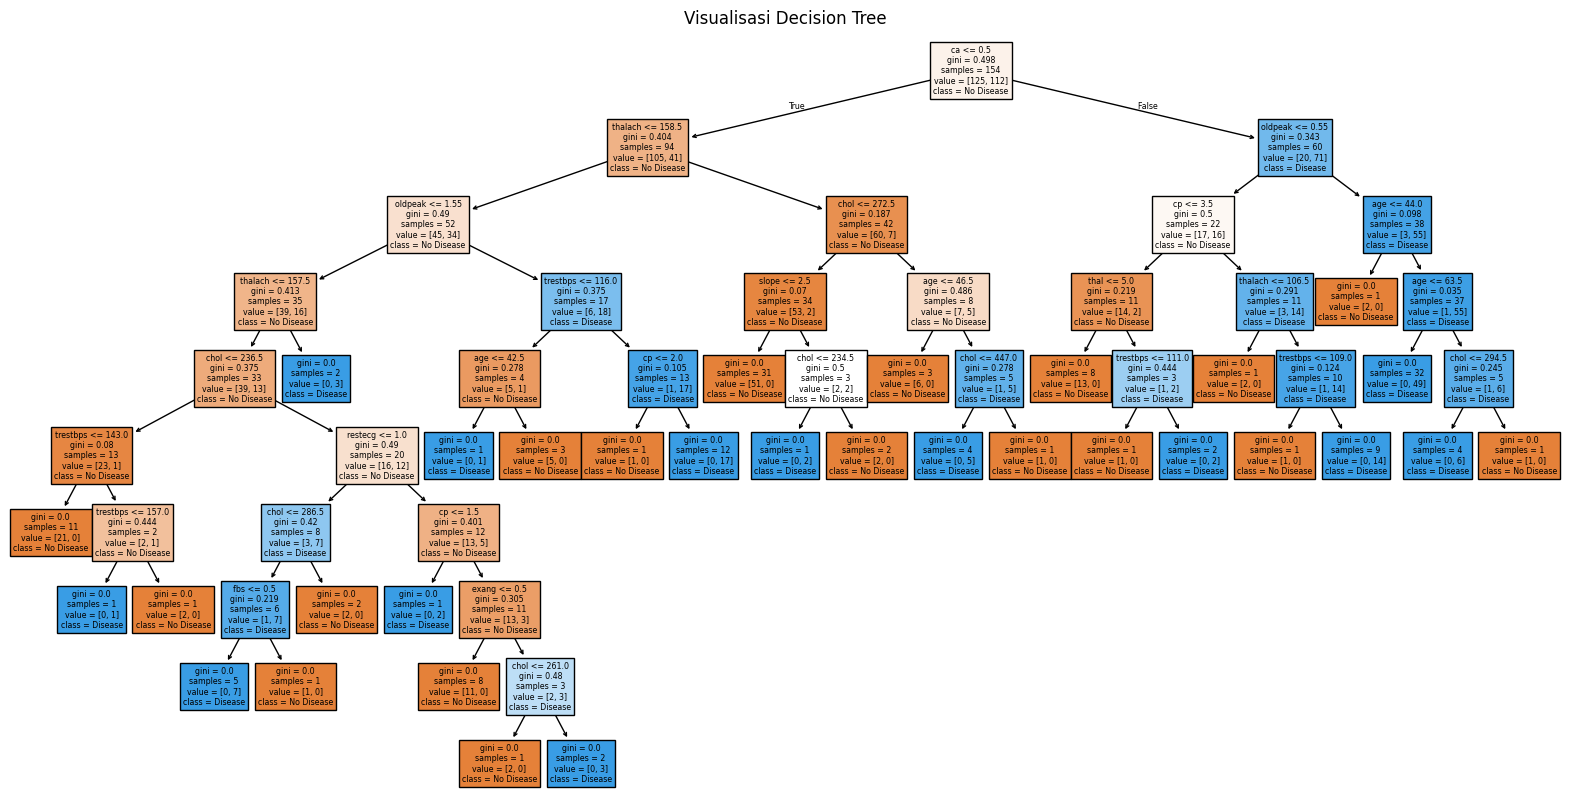

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Menampilkan salah satu Decision Tree dari ensemble
plt.figure(figsize=(20, 10))
plot_tree(bagging_model.estimators_[0], feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()


Pohon Keputusan memperlihatkan beberapa cabang yang kuat terutama pada nilai oldpeak, maka pembuatan keputusan yang tepat dalam memprediksi apakah seseorang pasien memiliki penyakit jantung atau tidak dapat dilihat dari indeks Depresi ST. Maka memungkinkan bahwa semakin besar Depresi ST maka semakin besar pula kemungkinan seorang pasien memiliki permasalahan dengan aliran darah jantung.
  